In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries 
import pickle

import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [3]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

36

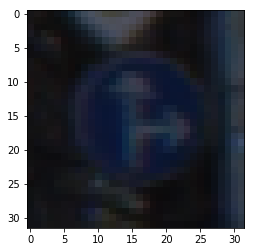

In [7]:
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]


In [8]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [9]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [10]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [11]:
X_train_gray.shape

(34799, 32, 32, 1)

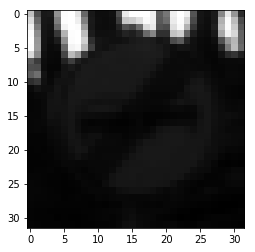

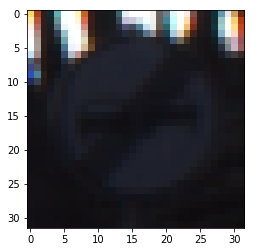

In [14]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])

In [13]:
# Import train_test_split from scikit library
# Import Keras
# import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

# from subprocess import check_output
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [15]:
image_shape = X_train_gray[i].shape

In [16]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3, 3, input_shape = image_shape, activation='relu'))
cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 128, activation = 'relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(output_dim = 43, activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [18]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        nb_epoch=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Instructions for updating:
Use tf.cast instead.
Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 72s 2ms/step - loss: 3.0489 - acc: 0.2012 - val_loss: 1.8020 - val_acc: 0.5181
Epoch 2/50
34799/34799 [==============================] - 76s 2ms/step - loss: 1.4395 - acc: 0.5988 - val_loss: 0.6522 - val_acc: 0.8311
Epoch 3/50
34799/34799 [==============================] - 80s 2ms/step - loss: 0.6964 - acc: 0.8029 - val_loss: 0.3998 - val_acc: 0.9000
Epoch 4/50
34799/34799 [==============================] - 80s 2ms/step - loss: 0.4516 - acc: 0.8709 - val_loss: 0.3308 - val_acc: 0.9086
Epoch 5/50
34799/34799 [==============================] - 93s 3ms/step - loss: 0.3345 - acc: 0.9035 - val_loss: 0.2576 - val_acc: 0.9304
Epoch 6/50
34799/34799 [==============================] - 89s 3ms/step - loss: 0.2700 - acc: 0.9222 - val_loss: 0.2484 - val_acc: 0.9306
Epoch 7/50
34799/34799 [==============================] - 86s 2ms/step - loss: 0.

In [19]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.9623


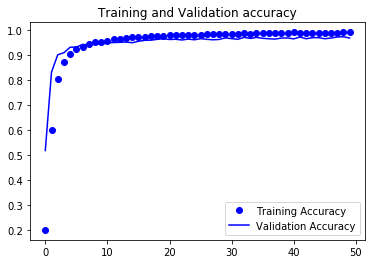

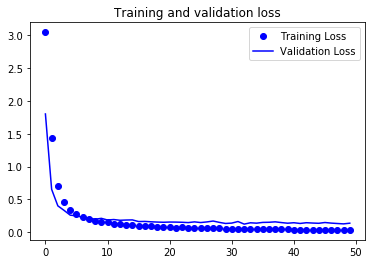

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

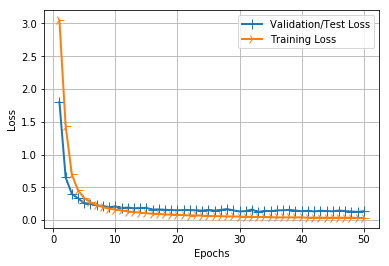

In [21]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label= 'Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

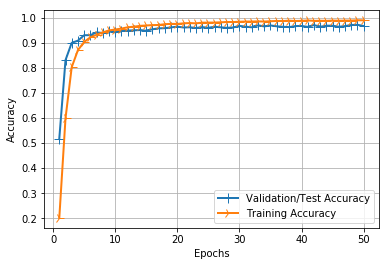

In [22]:
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label= 'Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [25]:
cnn_model.save("./trafficSign.h5")

In [26]:
from keras.models import load_model
model = load_model('./trafficSign.h5')

In [27]:
from keras.utils.vis_utils import plot_model
%matplotlib inline

In [28]:
from keras.utils import plot_model
plot_model(cnn_model, to_file='model.png',
          show_shapes= True,
          show_layer_names = True)

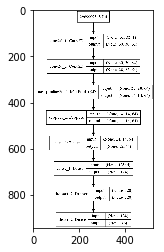

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('model.png')
plt.imshow(img)
plt.show()

In [34]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
cm

array([[ 53,   2,   0, ...,   0,   0,   0],
       [  0, 705,   2, ...,   0,   0,   0],
       [  0,   8, 740, ...,   0,   0,   0],
       ...,
       [  0,   1,   0, ...,  76,   0,   0],
       [  0,   0,   0, ...,   0,  37,   1],
       [  0,   0,   0, ...,   0,  11,  79]], dtype=int64)

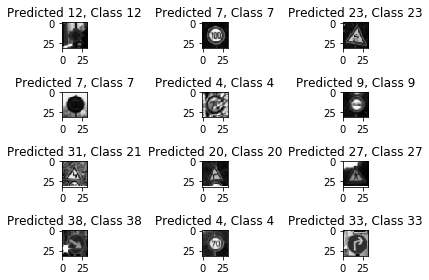

In [35]:
for i in range(0,12):
    plt.subplot(4,3,i+1)
    plt.imshow(X_test_gray_norm[i+10].squeeze(), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i+10], y_true[i+10]))
    plt.tight_layout()

In [38]:
from sklearn.metrics import classification_report
predictions = model.predict_classes(X_test_gray )
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.01      1.00      0.01        60
           1       1.00      0.10      0.17       720
           2       1.00      0.05      0.10       750
           3       1.00      0.01      0.02       450
           4       1.00      0.22      0.36       660
           5       0.00      0.00      0.00       630
           6       0.00      0.00      0.00       150
           7       1.00      0.08      0.15       450
           8       0.00      0.00      0.00       450
           9       1.00      0.00      0.01       480
          10       1.00      0.50      0.67       660
          11       1.00      0.08      0.15       420
          12       1.00      0.21      0.34       690
          13       1.00      0.89      0.94       720
          14       1.00      0.13      0.23       270
          15       0.00      0.00      0.00       210
          16       1.00      0.01      0.03       150
          17       1.00    

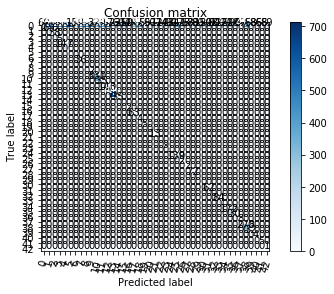

In [40]:
# Confussion matrix 
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75) 
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = range(43)
cm = confusion_matrix(predictions,y_test)

plt.figure(2)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')